In [1]:
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import cv2
import numpy as np
from PIL import Image

# Add the root of the project to the path
source_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(source_path)

# init

In [24]:
import pandas as pd

source_file="train_df_iam_rimes_20250613_174929.csv"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")
gw=6
prop=1
n_cc=1
sort_by="black_ratio"
running = 'new-laptop'
saved = 'new-laptop'
#i select the m patches per file that have the highest number of cc
m=5


In [25]:
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")
train_df=file_IO.change_filename_from_to(train_df, fr=saved, to=running)

In [26]:
train_df.head()

,file_name,source
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam
1,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam
2,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam
3,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam
4,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam


# run

In [27]:
train_df_expanded = pd.DataFrame(sum(train_df.apply(process_row, axis=1,args=(gw, n_cc,prop)), []))

train_df_expanded.head(10)

,file_name,source,x,y,x2,y2,n_cc,black_ratio
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,0,885,413,1298,145,0.041737
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,413,885,826,1298,17,0.064930
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,826,885,1239,1298,8,0.048455
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1239,885,1652,1298,11,0.053884
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1652,885,2065,1298,13,0.059413
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,2065,885,2478,1298,6,0.044551
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,0,1298,413,1711,201,0.049915
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,413,1298,826,1711,18,0.079334
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,826,1298,1239,1711,18,0.072457
0,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1239,1298,1652,1711,15,0.077060


In [31]:
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,file_name,source,x,y,x2,y2,n_cc,black_ratio
0,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,381,1524,762,1905,13,0.332700
1,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1143,1143,1524,18,0.293157
2,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1524,1143,1905,16,0.276273
3,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1239,1298,1652,1711,18,0.265980
4,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,381,1143,762,18,0.265002
5,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1652,1298,2065,1711,21,0.261912
6,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,814,814,1221,1221,13,0.261867
7,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1524,381,1905,762,10,0.260773
8,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1221,814,1628,1221,11,0.248688
9,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,407,1221,814,1628,23,0.243799


In [32]:
train_df_expanded_sorted = train_df_expanded.sort_values(by=sort_by, ascending=False)
train_df_expanded = train_df_expanded_sorted.groupby('file_name').head(m) 

In [33]:
train_df_expanded['index'] = train_df_expanded.groupby('file_name').ngroup()
train_df_expanded.head(10)

,file_name,source,x,y,x2,y2,n_cc,black_ratio,index
0,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,381,1524,762,1905,13,0.332700,1573
1,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1143,1143,1524,18,0.293157,1573
2,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1524,1143,1905,16,0.276273,1573
3,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1239,1298,1652,1711,18,0.265980,37
4,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,381,1143,762,18,0.265002,1573
5,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1652,1298,2065,1711,21,0.261912,34
6,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,814,814,1221,1221,13,0.261867,5460
7,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1524,381,1905,762,10,0.260773,1573
8,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1221,814,1628,1221,11,0.248688,5460
9,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,407,1221,814,1628,23,0.243799,5460


In [34]:
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,file_name,source,x,y,x2,y2,n_cc,black_ratio,index
0,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,381,1524,762,1905,13,0.332700,1573
1,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1143,1143,1524,18,0.293157,1573
2,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1524,1143,1905,16,0.276273,1573
3,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1239,1298,1652,1711,18,0.265980,37
4,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,381,1143,762,18,0.265002,1573
5,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1652,1298,2065,1711,21,0.261912,34
6,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,814,814,1221,1221,13,0.261867,5460
7,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1524,381,1905,762,10,0.260773,1573
8,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1221,814,1628,1221,11,0.248688,5460
9,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,407,1221,814,1628,23,0.243799,5460


# Visual check

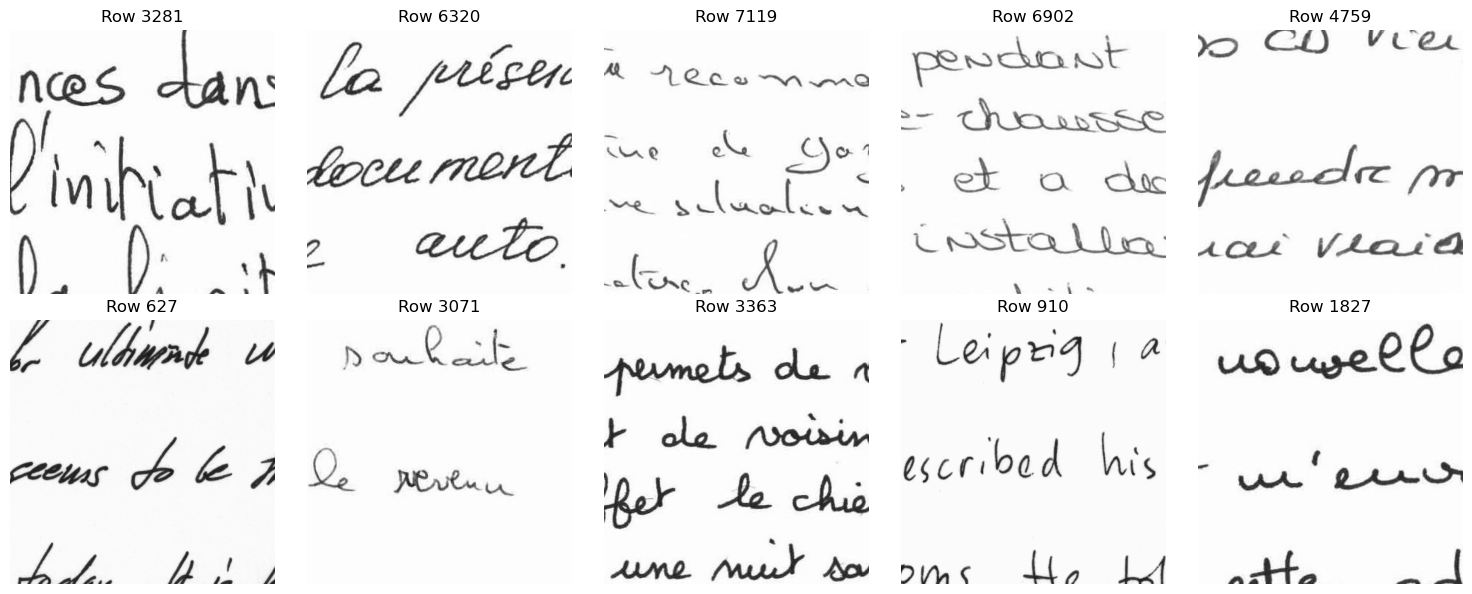

In [37]:
visualization.plot_cropped_sections(train_df_expanded)

In [ ]:
#train_df_expanded=file_IO.change_filename_from_to(train_df_expanded, fr=running, to='old-laptop') #to be compatible with the other scripts

In [38]:
train_df_expanded.head(10)

,file_name,source,x,y,x2,y2,n_cc,black_ratio,index
0,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,381,1524,762,1905,13,0.332700,1573
1,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1143,1143,1524,18,0.293157,1573
2,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,1524,1143,1905,16,0.276273,1573
3,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1239,1298,1652,1711,18,0.265980,37
4,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,762,381,1143,762,18,0.265002,1573
5,C:\Users\andre\PhD\Datasets\iam offline\forms\...,iam,1652,1298,2065,1711,21,0.261912,34
6,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,814,814,1221,1221,13,0.261867,5460
7,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1524,381,1905,762,10,0.260773,1573
8,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,1221,814,1628,1221,11,0.248688,5460
9,C:\Users\andre\PhD\Datasets\rimes\images_blocs...,rimes,407,1221,814,1628,23,0.243799,5460


# tests

In [ ]:
index_counts = train_df_expanded['index'].value_counts()
all_counts_correct = (index_counts == m).all()
print(f"Each unique index appears {m} times: {all_counts_correct}")
if not all_counts_correct:
    print("Indices with incorrect counts:")
    print(index_counts[index_counts != m])

In [29]:
# The number of patches per writer, should be 5*4
len(train_df_expanded)/282

20.0

In [42]:
tests.check_randomization(train_df_expanded)
tests.check_grouping(train_df_expanded)
tests.check_occurrences(train_df_expanded,count=4*m)

Number of rows where train == 1: 15180
Fraction of rows where train == 1: 0.90
The train column is constant for all writers.
Each unique writer value occurs on exactly 60 rows.


In [35]:
import random
random_numbers = random.sample(range(1, len(train_df_expanded)), 10)
for n in random_numbers:
    print(n)
    print('first df \n', train_df_expanded.iloc[n])
    i=train_df_expanded['writer'][n]
    #print('writer', i)
    print(train_df[train_df['writer'] == i])
    print('-------------')

3763
first df 
 writer                                                       189
isEng                                                          0
same_text                                                      0
file_name      D:\download\PD project\datasets\ICDAR 2013 - G...
male                                                           0
train                                                          1
index                                                        752
x                                                            984
y                                                            492
x2                                                          1230
y2                                                           738
n_cc                                                          21
black_ratio                                             0.054977
Name: 3763, dtype: object
     writer  isEng  same_text  \
752     189      0          0   
753     189      0          1   
754     189   

# save

In [39]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = os.path.join(source_path, "outputs", "preprocessed_data")
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

output_file = os.path.join(output_dir, f"icdar_train_df_iam_rimes_patches_{timestamp}.csv")
train_df_expanded.to_csv(output_file, index=False)

print(f"Dataframe saved to {output_file}")

Dataframe saved to c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_iam_rimes_patches_20250615_170212.csv


In [40]:
# Example usage:
LOG_FILE = output_dir+"\\file_metadata_log.json"
print(f"Log file path: {LOG_FILE}")
print(f"Output file path: {output_file}")
file_IO.add_or_update_file(
    output_file, LOG_FILE,
    custom_metadata={
        #"seed": seed,
        "m patches": m,
        "source_file": source_file,
        "gw": gw,
        "n_cc":n_cc,
        "prop": prop,
        "sort_by": sort_by,
        "description": '''
        creating the df for performing contrastive learning on iam and rimes. I am cropping the first and last quarter of the iam images and 
        dividing the width in gw patches''' 
    }
)

Log file path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\file_metadata_log.json
Output file path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_iam_rimes_patches_20250615_170212.csv
icdar_train_df_iam_rimes_patches_20250615_170212.csv
Updated log for icdar_train_df_iam_rimes_patches_20250615_170212.csv


In [22]:
file_IO.read_metadata(
    output_file,
    log_path=LOG_FILE
)

Metadata for icdar_train_df_patches_20250610_120640.csv:
full_path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_patches_20250610_120640.csv
size_bytes: 969119
created: 2025-06-10T12:06:40.325363
modified: 2025-06-10T12:06:40.347739
accessed: 2025-06-10T12:06:40.347739
m patches: 5
source_file: icdar_train_df_20250514_175905.csv
gw: 45
n_cc: 1
prop: 1
sort_by: black_ratio
description: 
        I am experimenting with decreasing progressively the patch size keeping 5 patches per writer.


In [23]:
'''import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Your metadata
metadata = {
    'author': 'Andrea Morelli',
    'date': timestamp,
    'description': 'dividing images in 25th and counting the number of ccs, using a threshold of 10. I extract the 5 patches with more ccs for each unique file'
}

# Convert DataFrame to pyarrow Table
table = pa.Table.from_pandas(train_df_expanded)

# Convert metadata to bytes and attach to schema
# Parquet metadata must be a dict of bytes
meta_bytes = {k: str(v).encode('utf-8') for k, v in metadata.items()}
table = table.replace_schema_metadata(meta_bytes)

# Write to Parquet file
pq.write_table(table, 'icdar_train_df_cc_5patches_perName.parquet')'''

'import pyarrow as pa\nimport pyarrow.parquet as pq\nfrom datetime import datetime\ntimestamp = datetime.now().strftime("%Y%m%d_%H%M%S")\n\n# Your metadata\nmetadata = {\n    \'author\': \'Andrea Morelli\',\n    \'date\': timestamp,\n    \'description\': \'dividing images in 25th and counting the number of ccs, using a threshold of 10. I extract the 5 patches with more ccs for each unique file\'\n}\n\n# Convert DataFrame to pyarrow Table\ntable = pa.Table.from_pandas(train_df_expanded)\n\n# Convert metadata to bytes and attach to schema\n# Parquet metadata must be a dict of bytes\nmeta_bytes = {k: str(v).encode(\'utf-8\') for k, v in metadata.items()}\ntable = table.replace_schema_metadata(meta_bytes)\n\n# Write to Parquet file\npq.write_table(table, \'icdar_train_df_cc_5patches_perName.parquet\')'

# experiments

In [ ]:
image_path = r"C:\\Users\\andre\\PhD\\Datasets\\iam offline\\forms\\formsE-H\\h02-037.png"
image_path = r"C:\\Users\\andre\\PhD\\Datasets\\iam offline\\forms\\formsE-H\\h02-019.png"
image = Image.open(image_path)  # Open the image
width, height = image.size
frac_height = height // 4
cropped = image.crop((0, frac_height, width, height- frac_height))  # Crop the image to the bottom three quarters
cropped.show()

# easy access

In [35]:
def reload_modules():
    import importlib
    import utils.image_processing as image_processing
    import utils.file_IO as file_IO
    import utils.visualization as visualization
    import utils.tests as tests

    importlib.reload(file_IO)
    importlib.reload(image_processing)
    importlib.reload(visualization)
    importlib.reload(tests)

    return image_processing, file_IO, visualization, tests
image_processing, file_IO, visualization, tests = reload_modules()

In [36]:
def process_row(row,gw=5,n_cc=10,prop=1):
    source= row["source"]
    image = Image.open(row["file_name"]).convert('RGB')  # Open the image
    if source == 'iam':
        width, height = image.size
        frac_height = height // 4
        image = image.crop((0, frac_height, width, height - frac_height))
    patches = extract_patches(image,gw=gw,n_cc=n_cc, prop=prop)  # Extract patches
    
    # Create a new row for each patch
    new_rows = []
    for (x, y, x2, y2,n_cc,b_ratio) in patches:
        new_row = row.copy()
        if source == 'iam':
            new_row["x"], new_row["y"], new_row["x2"], new_row["y2"],new_row["n_cc"],new_row["black_ratio"] = x, y+frac_height, x2, y2+frac_height, n_cc, b_ratio
        else:
            new_row["x"], new_row["y"], new_row["x2"], new_row["y2"],new_row["n_cc"],new_row["black_ratio"] = x, y, x2, y2, n_cc, b_ratio
        new_rows.append(new_row)
    
    return new_rows
def extract_patches(image,gw=5,n_cc=10, prop=1):
    image_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    h, w = image_gray.shape
    patch_w = w // gw
    patch_h = int(patch_w*prop)
    gh= int(h // patch_h)
    #print(gw,gh,h/patch_h)
    
    valid_patches = []
    
    for i in range(gh):
        for j in range(gw):
            x1, y1 = j * patch_w, i * patch_h
            x2, y2 = x1 + patch_w, y1 + patch_h
            patch = image_gray[y1:y2, x1:x2]
            
            # Check for text using connected components
            _, binary = cv2.threshold(patch, 180, 255, cv2.THRESH_BINARY_INV)
            num_labels, _, stats, _ = cv2.connectedComponentsWithStats(binary)
            
            if num_labels > n_cc:  # More than 1 means text is present
                #patch_rgb = image.crop((x1, y1, x2, y2))  # Extract RGB patch
                #areas = stats[1:, cv2.CC_STAT_AREA]  # skip background (label 0)
                black_pixel_count = np.sum(binary == 255)
                # Optionally: compute percentage of black
                total_pixels = binary.size
                black_ratio = black_pixel_count / total_pixels
                valid_patches.append((x1, y1, x2, y2,num_labels,black_ratio))
            # maybe you should filter based on the number of pixels
            #not on the number of different components (see): https://chatgpt.com/share/682d9a39-622c-8010-b50a-da370dcf214c
    return valid_patches